In [1]:
import sys
sys.path.append("..")

import Essentials


In [2]:
import numpy as np
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
import Essentials
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score
from abc import ABC, abstractmethod

In [3]:
# Загрузка данных
a = np.load('C:\\Users\\misha\\PLSSVD\\firs_nikita.npz', allow_pickle=True)
x1 = a['X_test_1']
x2 = a['X_train_1']


In [4]:
y1 = a['Y_test_1']
y2 = a['Y_train_1']
timestamp1 = y1[:, 1]
timestamp2 = y2[:, 1]

y1 = y1[:, 0].reshape(len(y1), 1)
y1 = y1.astype(np.float64)
y2 = y2[:, 0].reshape(len(y2), 1)
y2 = y2.astype(np.float64)


C:\Users\misha\AppData\Local\Temp\ipykernel_12876\3355000852.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y1 = y1.astype(np.float64)
C:\Users\misha\AppData\Local\Temp\ipykernel_12876\3355000852.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y2 = y2.astype(np.float64)


In [5]:
x2.shape

(57, 96)

In [6]:
y2.shape

(57, 1)

In [7]:
class RobustLinearSoftSensor(Essentials.SoftSensor):
    def __init__(self, name, x_train, y_train):
        super().__init__(name)  
        self.train(x_train, y_train)  

    def preprocessing(self, x):
        # Никакой предобработки данных не требуется
        return x

    def postprocessing(self, pred_values):
        # для визуализатора
        if pred_values.ndim == 1:
            pred_values = pred_values.reshape(-1, 1)
        return pred_values

    def evaluate_model(self, x):
        if self.get_model() is None:
            raise ValueError("Model is not trained yet.")
        return self.get_model().predict(x)

    def train(self, x_train, y_train):
        # Обучение модели HuberRegressor
        self.set_model(HuberRegressor())
        self.get_model().fit(x_train, y_train)
        # Оценка модели и сохранение коэффициента детерминации
        self.r2_score = self.get_model().score(x_train, y_train)
        self.coefficients = self.get_model().coef_

    def __str__(self):
        return (f"Robust Linear Soft Sensor '{self.get_name()}':\n"
                f"Coefficients: {self.coefficients}\n"
                f"R2 score: {self.r2_score}")



In [8]:
sensor = RobustLinearSoftSensor(name='Robust Linear Sensor', x_train=x2, y_train=y2)

c:\Users\misha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\misha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [9]:
print(sensor)

Robust Linear Soft Sensor 'Robust Linear Sensor':
Coefficients: [-1.86905728e-02 -1.16347558e-04  3.17855859e-02  1.00599849e-02
  6.13488389e-02 -1.15006180e-03 -1.51259320e-02  1.27872686e-02
  9.43510307e-03 -4.02909270e-02  1.27872686e-02  9.23609847e-03
  9.70122623e-02 -2.07743493e-02  5.18707033e-03 -3.25084144e-02
  9.61171480e-02  3.45353397e-02  8.52325698e-03 -2.41712358e-02
  9.29362026e-03  9.02509828e-03  9.40396394e-02  1.11966024e-03
 -6.62413852e-03  4.14942588e-03 -1.23851090e-01  1.17125854e-01
 -4.79667395e-02 -1.00876645e-02  4.47850577e-02  9.20525151e-02
 -1.45501169e-02  2.71346160e-02  4.71093495e-02  4.03416093e-03
 -6.77061053e-02  4.50241316e-03  7.03145932e-03 -2.19577990e-03
 -5.43218412e-02  1.20376799e-02  2.35929275e-02  1.87769710e-02
  2.16091727e-02 -2.07743493e-02  7.74863502e-02  1.94438701e-02
  4.93209788e-03 -2.14817774e-04 -9.48123295e-03  5.08239812e-03
 -1.99926418e-02  4.98949852e-03 -2.18280015e-02  5.24283159e-03
  2.46873313e-02  3.940527

In [10]:
metric = Essentials.R2Metric()

In [11]:
test_visual_1 = Essentials.Visualizer(x2, y2, timestamp2, [metric], 'Test SoftSensor R2 metric')

                      Coefficient of determination
Robust Linear Sensor                      0.837542


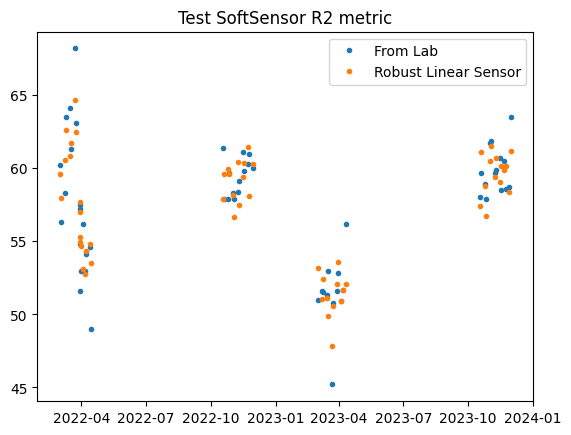

In [12]:

test_visual_1.visualize([sensor])

In [13]:
test_visual = Essentials.Visualizer(x1, y1, timestamp1, [metric], 'Test SoftSensor R2 metric')

                      Coefficient of determination
Robust Linear Sensor                     -0.525626


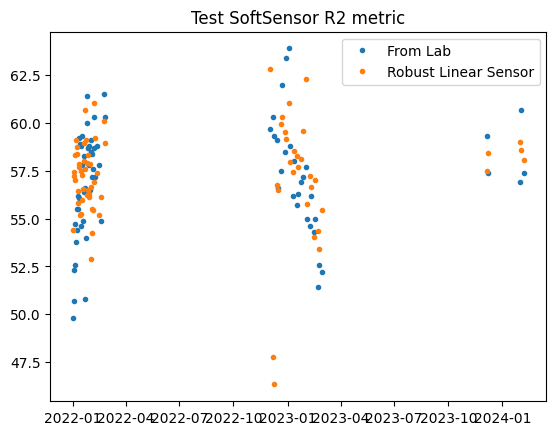

In [14]:
test_visual.visualize([sensor])